In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.show()

In [14]:
##DF analysis

In [15]:
data = pd.read_csv('sample_retail_sales_dataset final.csv')
display(data)

,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
0,ORD-00001,2023-02-27,CUST-0180,Mouse,2.0,355.07
1,ORD-00002,2023-12-17,CUST-0009,Keyboard,5.0,223.91
2,ORD-00003,2023-08-06,CUST-0072,Tablet,4.0,399.02
3,ORD-00004,2023-02-09,CUST-0193,Printer,5.0,368.69
4,ORD-00005,2023-10-02,CUST-0005,Keyboard,3.0,366.55
...,...,...,...,...,...,...
1003,ORD-00709,2023-12-30,CUST-0107,Mouse,5.0,580.11
1004,ORD-00710,2023-05-15,CUST-0193,Monitor,5.0,590.76
1005,ORD-00711,2023-04-08,CUST-0150,Printer,5.0,622.89
1006,ORD-00712,2023-02-25,CUST-0176,Tablet,5.0,1152.28


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1008 non-null   object 
 1   Date              1005 non-null   object 
 2   Customer ID       1004 non-null   object 
 3   Product           1006 non-null   object 
 4   Quantity Ordered  1006 non-null   float64
 5   Price             1007 non-null   float64
dtypes: float64(2), object(4)
memory usage: 47.4+ KB


In [17]:
## Check for missing values
for col in data.columns: 
    print(f"empty values for column '{col}':")
    display(data[data[col].isna()])
    print("-"*20)

empty values for column 'Order ID':


,Order ID,Date,Customer ID,Product,Quantity Ordered,Price


--------------------
empty values for column 'Date':


,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
825,ORD-00826,NaN,CUST-0091,Keyboard,5.0,667.71
826,ORD-00827,NaN,CUST-0163,Laptop,1.0,178.33
827,ORD-00828,NaN,CUST-0154,Laptop,2.0,1294.49


--------------------
empty values for column 'Customer ID':


,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
864,ORD-00865,2023-01-04,NaN,Mouse,2.0,513.35
865,ORD-00866,2023-12-18,NaN,Smartphone,4.0,846.60
866,ORD-00867,2023-06-05,NaN,Tablet,5.0,1243.51
867,ORD-00868,2023-10-11,NaN,Laptop,5.0,1275.72


--------------------
empty values for column 'Product':


,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
781,ORD-00782,2023-07-04,CUST-0014,NaN,2.0,1019.24
885,ORD-00886,2023-09-15,CUST-0100,NaN,3.0,1406.81


--------------------
empty values for column 'Quantity Ordered':


,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
915,ORD-00916,2023-08-02,CUST-0149,Smartphone,NaN,1293.18
954,ORD-00955,2023-11-06,CUST-0103,Keyboard,NaN,1083.98


--------------------
empty values for column 'Price':


,Order ID,Date,Customer ID,Product,Quantity Ordered,Price
971,ORD-00972,2023-09-18,CUST-0115,Smartphone,2.0,NaN


--------------------


In [18]:
## Handle missing values by replacing with median
data['Quantity Ordered'].fillna(data['Quantity Ordered'].median(), inplace=True)
data['Price'].fillna(data['Price'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_36512\1286550333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Quantity Ordered'].fillna(data['Quantity Ordered'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_36512\1286550333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [19]:
## Change Date type
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Order ID                    object
Date                datetime64[ns]
Customer ID                 object
Product                     object
Quantity Ordered           float64
Price                      float64
dtype: object

In [20]:
## Rename Price Column
data = data.rename(columns = {'Price':'Unit Price'})

In [21]:
## Calculate total sales and filtering out values in QO and Unit Price that may be 0 or negative. 
data = data[(data['Quantity Ordered'] > 0) & (data['Unit Price'] > 0)]
data['Total Sales'] = data['Quantity Ordered']*data['Unit Price']

In [22]:
## Extract Year, Quarter, Month and Day to new columns
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['Month'] = data['Date'].dt.month_name()
data['Weekday'] = data['Date'].dt.day_name()
data['Year-Week'] = data['Date'].dt.isocalendar().week
data.head()

,Order ID,Date,Customer ID,Product,Quantity Ordered,Unit Price,Total Sales,Year,Quarter,Month,Weekday,Year-Week
0,ORD-00001,2023-02-27,CUST-0180,Mouse,2.0,355.07,710.14,2023.0,1.0,February,Monday,9
1,ORD-00002,2023-12-17,CUST-0009,Keyboard,5.0,223.91,1119.55,2023.0,4.0,December,Sunday,50
2,ORD-00003,2023-08-06,CUST-0072,Tablet,4.0,399.02,1596.08,2023.0,3.0,August,Sunday,31
3,ORD-00004,2023-02-09,CUST-0193,Printer,5.0,368.69,1843.45,2023.0,1.0,February,Thursday,6
4,ORD-00005,2023-10-02,CUST-0005,Keyboard,3.0,366.55,1099.65,2023.0,4.0,October,Monday,40


In [23]:
## Handle missing Year values after adding new columns and converted from float. 
data['Year'] = data['Year'].fillna(2023.0).astype('int64')

In [28]:
data['Quantity Ordered'].mean()

3.0515873015873014

In [36]:
## Order weekdays for Total Sales
day_order = ['Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday', 'Saturday', 'Sunday']
## Calculate Total Sales by Weekday
daily_sales = data.groupby('Weekday')['Total Sales'].sum().reset_index()
daily_sales['Weekday']=pd.Categorical(daily_sales['Weekday'], categories=day_order, ordered=True)
daily_sales = daily_sales.sort_values('Weekday')
daily_sales

,Weekday,Total Sales
1,Monday,338634.81
5,Tuesday,324498.04
6,Wednesday,335955.95
4,Thursday,340301.82
0,Friday,376044.43
2,Saturday,334504.66
3,Sunday,357996.11


In [132]:
## Order month for total sales
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
## Calculate Total Sales by month 
monthly_sales = data.groupby(['Year','Month'])['Total Sales'].sum().reset_index()
monthly_sales['Month']=pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')
monthly_sales

,Year,Month,Total Sales
4,2023,January,174791.55
3,2023,February,175949.85
7,2023,March,223152.34
0,2023,April,211397.78
8,2023,May,208966.07
6,2023,June,207100.91
5,2023,July,196665.98
1,2023,August,203137.02
11,2023,September,187938.61
10,2023,October,186517.36


In [41]:
quarterly_sales = data.groupby('Quarter')['Total Sales'].sum().reset_index()
quarterly_sales = quarterly_sales.sort_values('Quarter')
quarterly_sales

,Quarter,Total Sales
0,1.0,573893.74
1,2.0,627464.76
2,3.0,587741.61
3,4.0,618835.71


In [43]:
## Calculate Total Sales by Year-Week 
week_sales = data.groupby(['Year','Year-Week'])['Total Sales'].sum().reset_index()
week_sales = week_sales.sort_values('Year-Week')
week_sales

,Year,Year-Week,Total Sales
0,2023,1,34893.42
1,2023,2,48654.36
2,2023,3,34858.08
3,2023,4,37168.14
4,2023,5,40740.17
5,2023,6,48936.19
6,2023,7,35938.55
7,2023,8,53682.60
8,2023,9,39695.35
9,2023,10,53103.64


In [146]:
## Identify best selling product by total quantity ordered & total sales value
best_selling_products = data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Total Sales': 'sum'})
best_selling_products.sort_values(by='Total Sales', ascending=False, inplace=True)
best_selling_products

,Quantity Ordered,Total Sales
Product,,
Smartphone,536.0,403057.62
Tablet,471.0,392577.84
Mouse,428.0,342948.72
Monitor,441.0,334119.42
Keyboard,420.0,330940.39
Printer,381.0,305835.23
Laptop,394.0,298303.55


In [47]:
## Average Order Value
avg_order_value = data['Total Sales'].mean()
avg_order_value

2394.882619047619

In [49]:
## Average Order Value Per Product
avg_per_product = data.groupby('Product')['Total Sales'].mean().reset_index()
avg_per_product.rename(columns={'Total Sales': 'Avg Order Value'}, inplace=True)
avg_per_product = avg_per_product.sort_values(by= 'Avg Order Value', ascending=False)
avg_per_product

,Product,Avg Order Value
6,Tablet,2617.185600
3,Mouse,2467.256978
5,Smartphone,2428.057952
4,Printer,2370.815736
0,Keyboard,2363.859929
2,Monitor,2304.271862
1,Laptop,2177.398175


In [51]:
## Recency Frequency Monetary (RFM Analysis)
last_date = data['Date'].max()
rfm = data.groupby('Customer ID').agg({'Total Sales': 'sum', 'Order ID': 'count', 'Date': lambda x: (last_date - x.max()).days}).sort_values(by='Total Sales', ascending=False)
rfm.rename(columns ={'Date': 'Recency', 'Order ID': 'Frequency', 'Total Sales': 'Monetary'}, inplace=True)
rfm

,Monetary,Frequency,Recency
Customer ID,,,
CUST-0107,33499.13,8,1
CUST-0176,31456.91,10,89
CUST-0018,29025.98,8,60
CUST-0103,28241.80,10,3
CUST-0045,27919.71,9,24
...,...,...,...
CUST-0059,1245.48,1,53
CUST-0129,1092.51,2,2
CUST-0058,996.72,1,252


In [53]:
## Define RFM quintiles
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 16.0, 0.4: 34.2, 0.6: 57.8, 0.8: 103.4},
 'Frequency': {0.2: 3.0, 0.4: 4.0, 0.6: 6.0, 0.8: 7.0},
 'Monetary': {0.2: 5914.548, 0.4: 10011.038, 0.6: 12849.668, 0.8: 17732.158}}

In [73]:
## Define if loop to create quintiles value for R score and FM score
def r_score(x):
         if x <= quintiles['Recency'][.2]:
             return 5
         elif x <= quintiles['Recency'][.4]:
             return 4
         elif x <= quintiles['Recency'][.6]:
             return 3
         elif x <= quintiles['Recency'][.8]:
             return 2
         else:
             return 1

def fm_score(x, c):
         if x <= quintiles[c][.2]:
             return 1
         elif x <= quintiles[c][.4]:
             return 2
         elif x <= quintiles[c][.6]:
             return 3
         elif x <= quintiles[c][.8]:
             return 4
         else:
             return 5

In [75]:
## Create column R F M and apply quintile scores
rfm['R'] = rfm['Recency'].apply(r_score)
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Frequency'))

In [77]:
## Sum total RFM score and also create RFM segment for ease of view
rfm['RFM Score'] = rfm[['R','F','M']].sum(axis=1)
rfm['RFM Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,Monetary,Frequency,Recency,R,F,M,RFM Score,RFM Segment
Customer ID,,,,,,,,
CUST-0107,33499.13,8,1,5,5,5,15,555
CUST-0176,31456.91,10,89,2,5,5,12,255
CUST-0018,29025.98,8,60,2,5,5,12,255
CUST-0103,28241.80,10,3,5,5,5,15,555
CUST-0045,27919.71,9,24,4,5,5,14,455


In [124]:
## Create Segment Value labels based on RFM Score
segment_labels = ['Low Value', 'Mid Value', 'High Value']

def assign_segment(score):
  if score < 5:
      return 'Low Value'
  elif score < 10:
      return 'Mid Value'
  else:
      return 'High Value'

rfm['RFM Segment Label'] = rfm['RFM Score'].apply(assign_segment)

In [81]:
## See how many customers in each segment
segment_counts = rfm['RFM Segment Label'].value_counts().reset_index()
segment_counts.columns = ['RFM Segment', 'Count']
segment_counts = segment_counts.sort_values('RFM Segment')

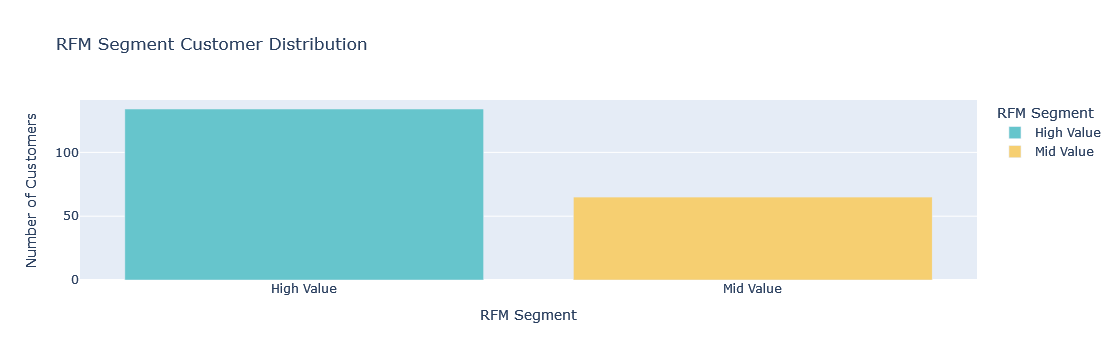

In [85]:
## Create bar chart
import plotly.express as px
fig = px.bar(segment_counts, 
             x='RFM Segment', 
             y='Count', 
             title='RFM Segment Customer Distribution', 
             labels={'RFM Segment': 'RFM Segment', 'Count': 'Number of Customers'},
             color='RFM Segment',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [118]:
## Sub segmentation within RFM to categorize types of customer
def assign_sub_segment(score): 
    if score >= 13: 
      return 'VIP'
    elif score >= 9:  
      return 'Potential VIP'
    elif score >= 5: 
      return 'At Risk'
    else:
      return 'Lost'

In [122]:
## new column
rfm['Sub Segment'] = rfm['RFM Score'].apply(assign_sub_segment)
rfm

,Monetary,Frequency,Recency,R,F,M,RFM Score,RFM Segment,RFM Segment Label,Sub Segment
Customer ID,,,,,,,,,,
CUST-0107,33499.13,8,1,5,5,5,15,555,High Value,VIP
CUST-0176,31456.91,10,89,2,5,5,12,255,High Value,Potential VIP
CUST-0018,29025.98,8,60,2,5,5,12,255,High Value,Potential VIP
CUST-0103,28241.80,10,3,5,5,5,15,555,High Value,VIP
CUST-0045,27919.71,9,24,4,5,5,14,455,High Value,VIP
...,...,...,...,...,...,...,...,...,...,...
CUST-0059,1245.48,1,53,3,1,5,9,315,Mid Value,Potential VIP
CUST-0129,1092.51,2,2,5,1,5,11,515,High Value,Potential VIP
CUST-0058,996.72,1,252,1,1,5,7,115,Mid Value,At Risk


In [126]:
## Count occurrence of customers in each segment
segment_counts = rfm.groupby(['RFM Segment Label', 'Sub Segment']).size().reset_index(name='Count')

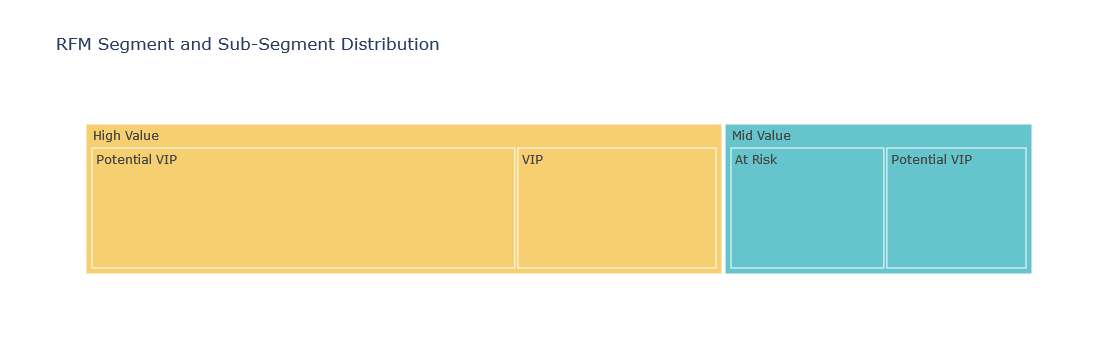

In [128]:
fig = px.treemap(
  segment_counts,
  path=['RFM Segment Label', 'Sub Segment'],  # Define the hierarchy
  values='Count',  # Size of each box
  color='RFM Segment Label',  # Color by main segment
  title='RFM Segment and Sub-Segment Distribution',
  color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.show()

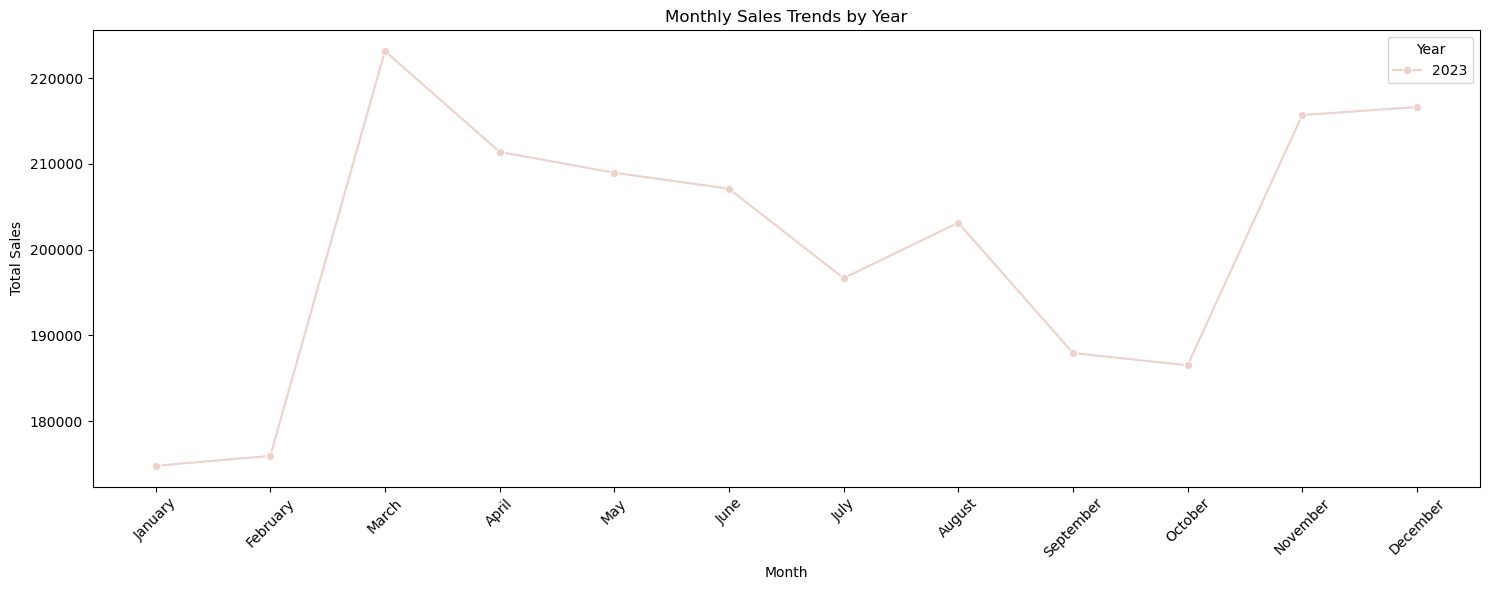

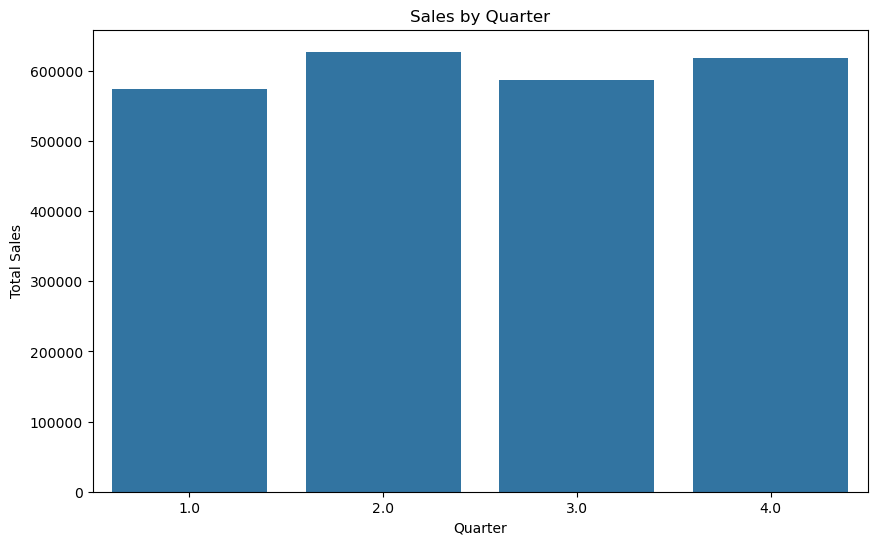

In [151]:
# Monthly Sales Trend
plt.figure(figsize=(15,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trends by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quarterly Sales
plt.figure(figsize=(10,6))
sns.barplot(data=quarterly_sales, x='Quarter', y='Total Sales')
plt.title('Sales by Quarter')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_36512\3375852767.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




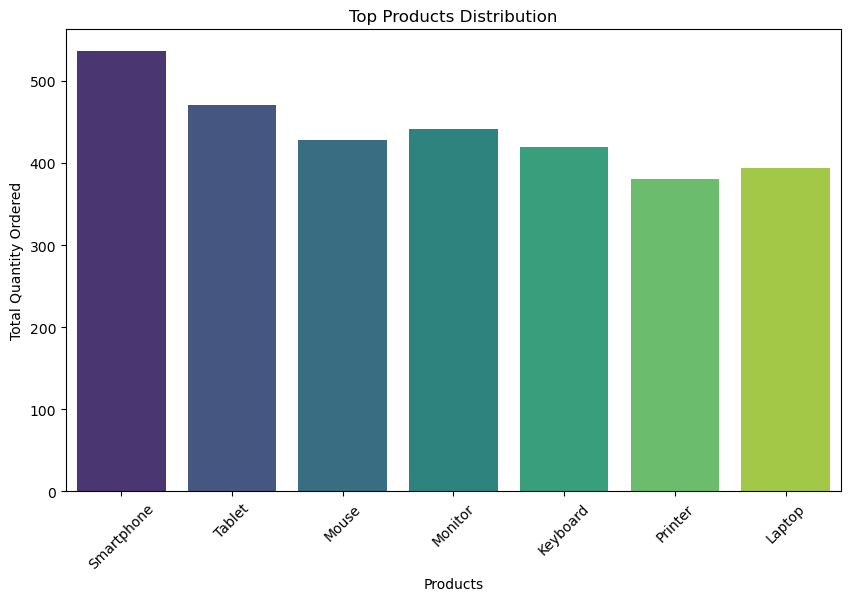

In [159]:
## Visualization Product Distribution

plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Quantity Ordered', data=best_selling_products, palette='viridis')
plt.title('Top Products Distribution')
plt.xlabel('Products')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

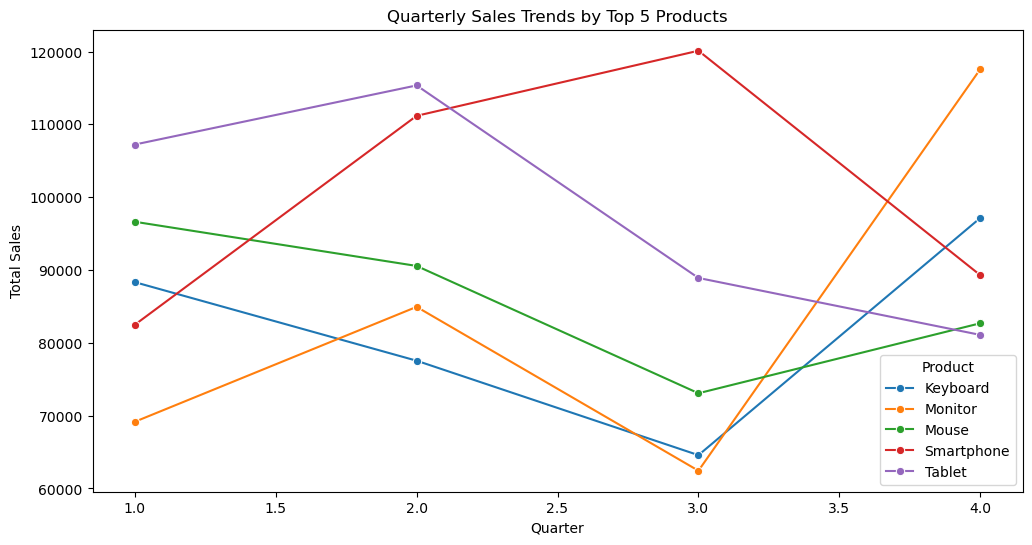

In [163]:
# Create product sales by quarter
product_quarterly = data.groupby(['Quarter', 'Product'])['Total Sales'].sum().reset_index()

# Plot top 5 products across quarters
top_5_products = best_selling_products.head().index.tolist()
product_quarterly_filtered = product_quarterly[product_quarterly['Product'].isin(top_5_products)]

plt.figure(figsize=(12,6))
sns.lineplot(data=product_quarterly_filtered, 
           x='Quarter', y='Total Sales', 
           hue='Product', marker='o')
plt.title('Quarterly Sales Trends by Top 5 Products')
plt.show()

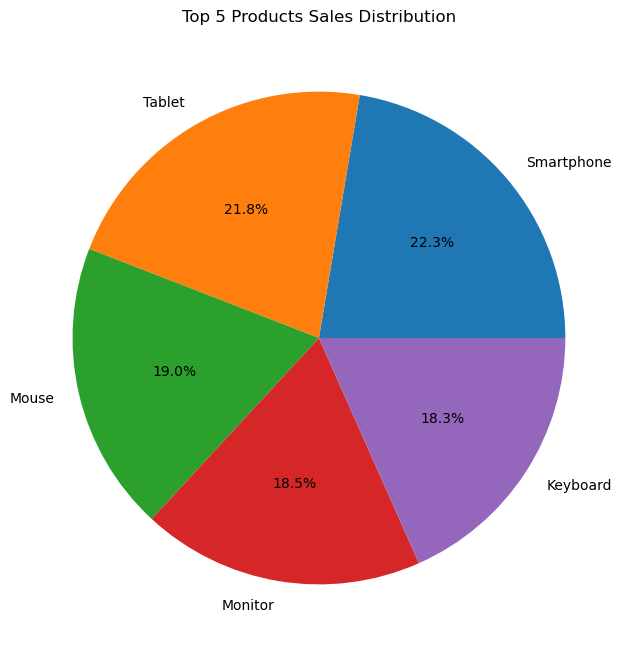

In [169]:
# Product Sales Distribution (Pie Chart)
plt.figure(figsize=(12,8))
plt.pie(best_selling_products['Total Sales'].head(5), 
      labels=best_selling_products.head(5).index, 
      autopct='%1.1f%%')
plt.title('Top 5 Products Sales Distribution')
plt.show()

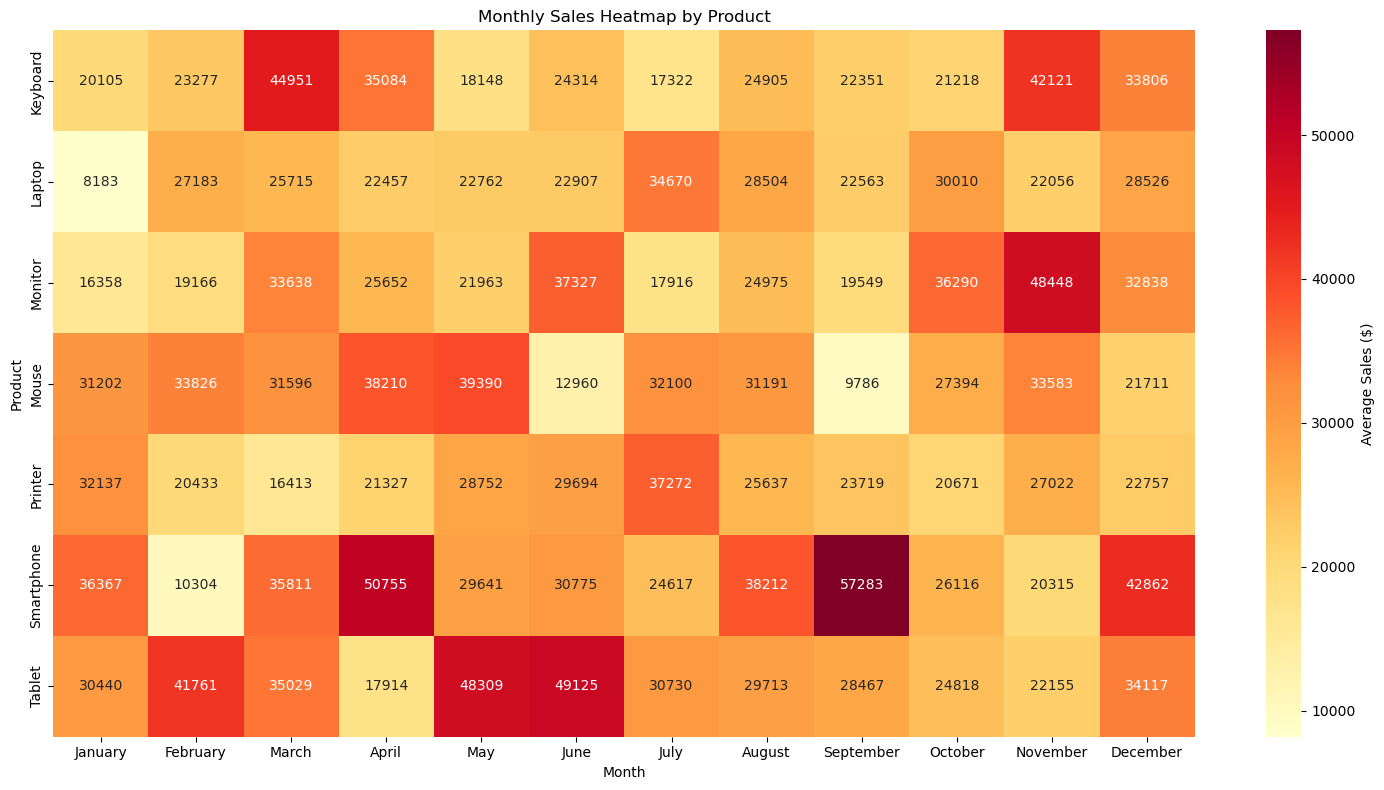

In [181]:
monthly_product_sales = data.pivot_table(
  index='Product', 
  columns='Month', 
  values='Total Sales', 
  aggfunc='sum'
)

# Reorder the columns by month
monthly_product_sales = monthly_product_sales.reindex(columns=month_order)

plt.figure(figsize=(15,8))
sns.heatmap(monthly_product_sales, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Average Sales ($)'})
plt.title('Monthly Sales Heatmap by Product')
plt.tight_layout()
plt.show()

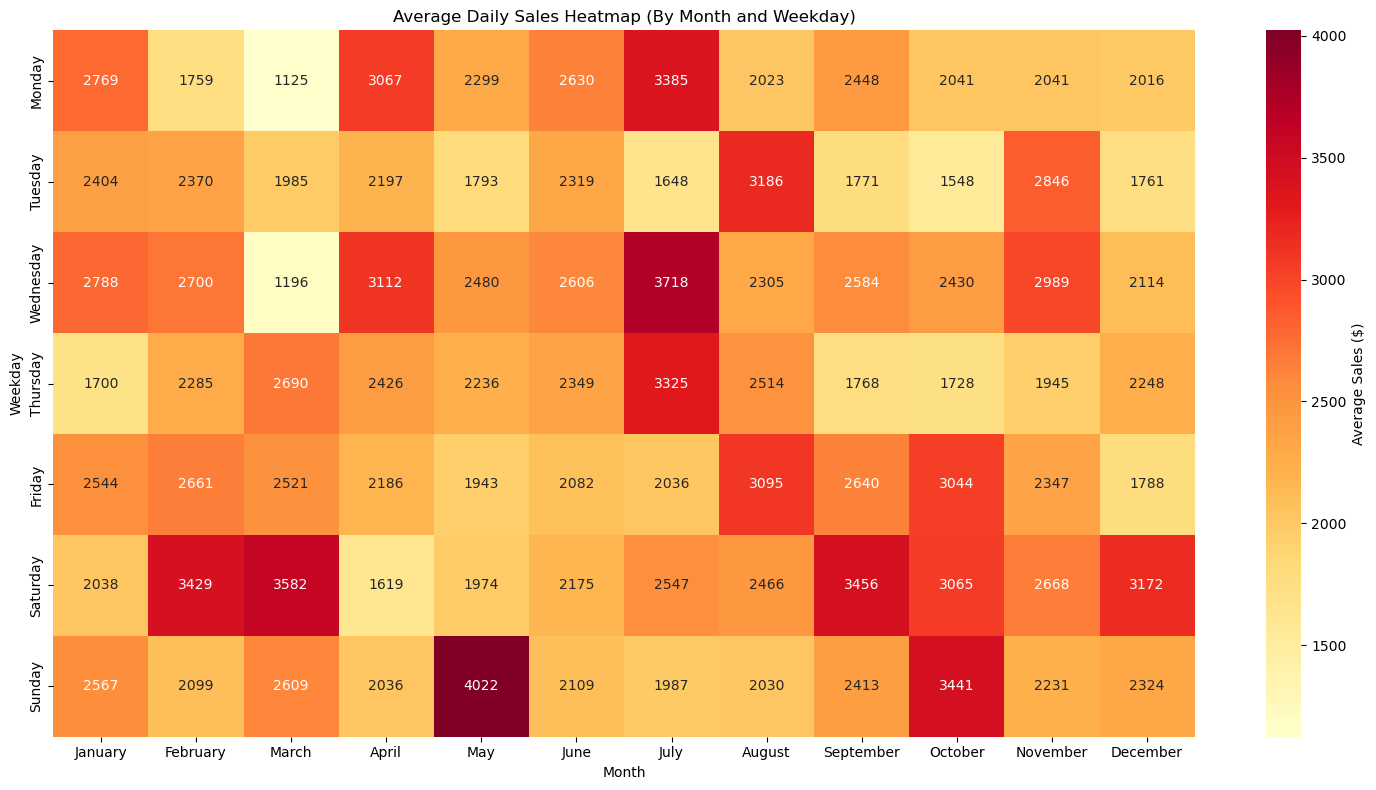

In [175]:
weekly_monthly_sales = data.pivot_table(
  values='Total Sales',
  index='Weekday',
  columns='Month',
  aggfunc='mean'
)

# Reorder the index to start with Monday and columns by month
weekly_monthly_sales = weekly_monthly_sales.reindex(index=day_order, columns=month_order)

plt.figure(figsize=(15, 8))
sns.heatmap(weekly_monthly_sales, 
          cmap='YlOrRd', 
          annot=True, 
          fmt='.0f',
          cbar_kws={'label': 'Average Sales ($)'})
plt.title('Average Daily Sales Heatmap (By Month and Weekday)')
plt.tight_layout()
plt.show()


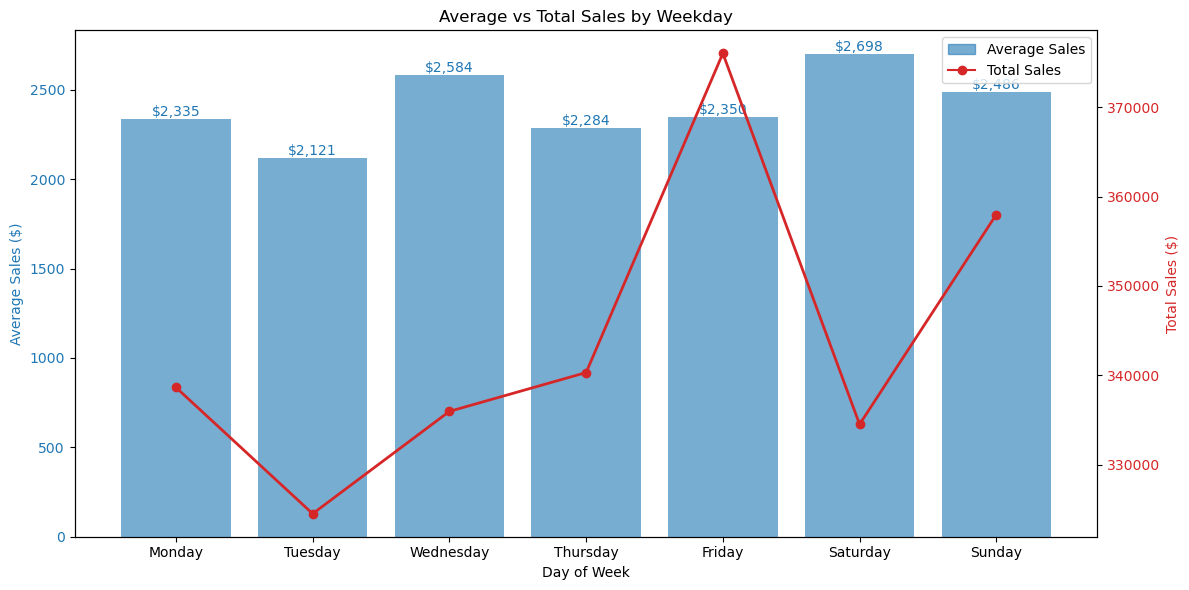


Detailed Sales Summary by Weekday:
  Weekday  Average Sales  Total Sales  Number of Transactions
   Monday        2335.41    338634.81                     145
  Tuesday        2120.90    324498.04                     153
Wednesday        2584.28    335955.95                     130
 Thursday        2283.90    340301.82                     149
   Friday        2350.28    376044.43                     160
 Saturday        2697.62    334504.66                     124
   Sunday        2486.08    357996.11                     144

Best performing days:
Highest average sales: Saturday
Highest total sales: Friday


In [173]:
# Calculate average sales per weekday
avg_daily_sales = data.groupby('Weekday')['Total Sales'].agg(['mean', 'sum', 'count']).reset_index()
avg_daily_sales['Weekday'] = pd.Categorical(avg_daily_sales['Weekday'], categories=day_order, ordered=True)
avg_daily_sales = avg_daily_sales.sort_values('Weekday')

# Create a dual-axis plot to show both average and total sales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average sales (bar plot)
color1 = 'tab:blue'
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average Sales ($)', color=color1)
bars = ax1.bar(avg_daily_sales['Weekday'], avg_daily_sales['mean'], color=color1, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color1)

# Create second y-axis for total sales
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Total Sales ($)', color=color2)
line = ax2.plot(avg_daily_sales['Weekday'], avg_daily_sales['sum'], color=color2, linewidth=2, marker='o')
ax2.tick_params(axis='y', labelcolor=color2)

# Add value labels on bars
for bar in bars:
  height = bar.get_height()
  ax1.text(bar.get_x() + bar.get_width()/2., height,
           f'${height:,.0f}',
           ha='center', va='bottom', color=color1)

plt.title('Average vs Total Sales by Weekday')
plt.xticks(rotation=45)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
  plt.Rectangle((0,0),1,1, color=color1, alpha=0.6),
  Line2D([0], [0], color=color2, marker='o')
]
plt.legend(legend_elements, ['Average Sales', 'Total Sales'])

plt.tight_layout()
plt.show()

# Create a detailed summary table
avg_daily_sales['mean'] = avg_daily_sales['mean'].round(2)
avg_daily_sales['sum'] = avg_daily_sales['sum'].round(2)
avg_daily_sales.columns = ['Weekday', 'Average Sales', 'Total Sales', 'Number of Transactions']
print("\nDetailed Sales Summary by Weekday:")
print(avg_daily_sales.to_string(index=False))

# Calculate and display the best performing days
best_avg_day = avg_daily_sales.loc[avg_daily_sales['Average Sales'].idxmax(), 'Weekday']
best_total_day = avg_daily_sales.loc[avg_daily_sales['Total Sales'].idxmax(), 'Weekday']

print(f"\nBest performing days:")
print(f"Highest average sales: {best_avg_day}")
print(f"Highest total sales: {best_total_day}")

In [ ]:
## Conclusion

# RFM High Value segment indicates a 32.1% existing VIP base customer, with 67.9% remaining in the Potential VIP.  
# RFM Mid Value segment indicates a 52% At Risk and 48% Potential VIP, indicating that within Mid Value half of the customers can be lost customers. 
# Product Performance - Top 5 products show relatively balance split Smartphones 22.3% / Tablets 21.8% / Mouse 19% / Monitor 18.5%.
# Highest sales occur in March 2023 ($220,000+) and Nov-Dec 2023 ($210,000)
# Lowest sales occur in Jan-Feb and Sept-Oct. 
# Indicates seasonal patterns with sales peaking in spring winter holiday season. 
# Saturdays are best perfoming days overall : avg sales $2,697.62
# Friday has highest total sales: $376,044.43
# Friday also has most transactions : 160